In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Assuming the data is loaded from CSV files (replace paths with your actual file paths)
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [9]:
# Select features for clustering
clustering_features = data[['CustomerID', 'TotalValue', 'Quantity', 'Price_x']]
print(clustering_features.head())

  CustomerID  TotalValue  Quantity  Price_x
0      C0199      300.68         1   300.68
1      C0146      300.68         1   300.68
2      C0127      300.68         1   300.68
3      C0087      601.36         2   300.68
4      C0070      902.04         3   300.68


In [10]:
# K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(clustering_features[['TotalValue', 'Quantity', 'Price_x']])

# Davies-Bouldin Index for cluster quality
db_index = davies_bouldin_score(clustering_features[['TotalValue', 'Quantity', 'Price_x']], clusters)
print(f'DB Index: {db_index}')

DB Index: 0.6298057830908373


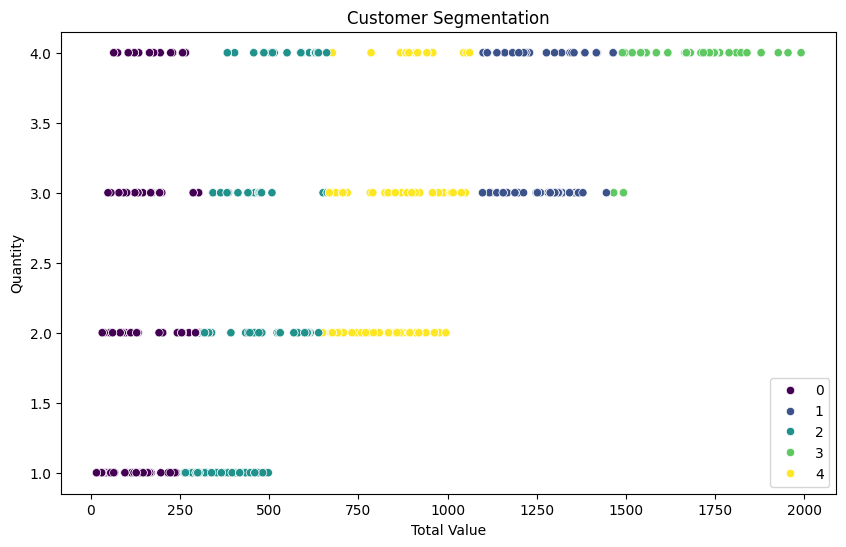

In [11]:
# Customer segmentation visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue=clusters, palette='viridis', data=clustering_features)
plt.title('Customer Segmentation')
plt.xlabel('Total Value')
plt.ylabel('Quantity')
plt.show()